# Weekly Project 2! - Saad Albadiya

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [293]:
#import
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [5]:
df = pd.read_csv('RTA_Dataset.csv')

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [9]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2605,7:30:00,Sunday,Unknown,Female,Junior high school,Employee,Below 1yr,NaN,Owner,Above 10yr,...,Going straight,Pedestrian,Female,18-30,3,NaN,Normal,Not a Pedestrian,No distancing,Slight Injury
10014,19:20:00,Sunday,Unknown,Female,Junior high school,Employee,5-10yr,Public (> 45 seats),Owner,1-2yr,...,NaN,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
9310,16:20:00,Sunday,Unknown,Female,Elementary school,Employee,Above 10yr,Automobile,Owner,2-5yrs,...,Going straight,Pedestrian,Male,18-30,3,Driver,Normal,"Walking along in carriageway, back to traffic",No priority to vehicle,Slight Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
7682,14:50:00,Monday,31-50,Male,High school,Owner,Above 10yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
415,12:48:00,Friday,31-50,Male,Elementary school,Employee,2-5yr,Pick up upto 10Q,Owner,5-10yrs,...,Going straight,Pedestrian,Male,31-50,3,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
9098,15:30:00,Tuesday,18-30,Male,Junior high school,Employee,5-10yr,Stationwagen,Governmental,NaN,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
11692,17:41:00,Monday,18-30,Female,Junior high school,Employee,Below 1yr,Stationwagen,Owner,5-10yrs,...,Waiting to go,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
9147,10:40:00,Friday,31-50,Male,Elementary school,Employee,2-5yr,Automobile,Owner,Unknown,...,U-Turn,Pedestrian,Female,Over 51,3,NaN,NaN,Unknown or other,No distancing,Slight Injury
10404,12:29:00,Tuesday,31-50,Male,Junior high school,Employee,5-10yr,Pick up upto 10Q,Owner,Unknown,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [10]:
#Dropping non-needed columns
used_cols = ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Driving_experience', 'Area_accident_occured',
'Types_of_Junction', 'Light_conditions', 'Cause_of_accident', 'Accident_severity']

df = df.loc[:, used_cols]

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [12]:
#nan recognition:
df.replace({'Unknown' : np.nan,
            'unknown' : np.nan}, regex=True, inplace=True)

#This is the same act regardless of which direction:
df['Cause_of_accident'].replace(['Changing lane to the right', 'Changing lane to the left'], 'Changing lane', inplace = True)

# Making it a 0, 1 classification as we label both of them as life-threatning:
df['Accident_severity'].replace('Fatal injury', 'Serious Injury', inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9104\3692419871.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cause_of_accident'].replace(['Changing lane to the right', 'Changing lane to the left'], 'Changing lane', inplace = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9104\3692419871.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

<Axes: xlabel='Accident_severity', ylabel='count'>

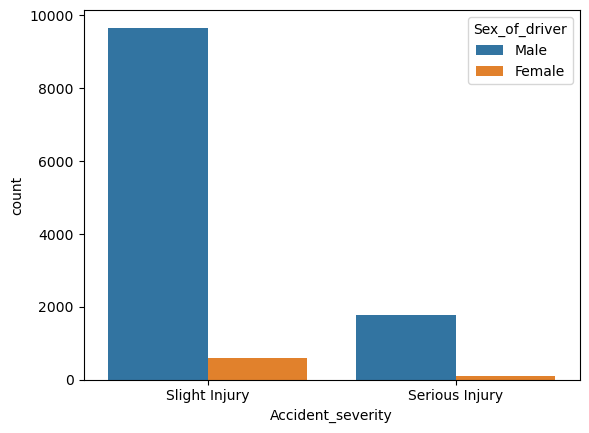

In [13]:
sb.countplot(data=df, x="Accident_severity", hue = 'Sex_of_driver');

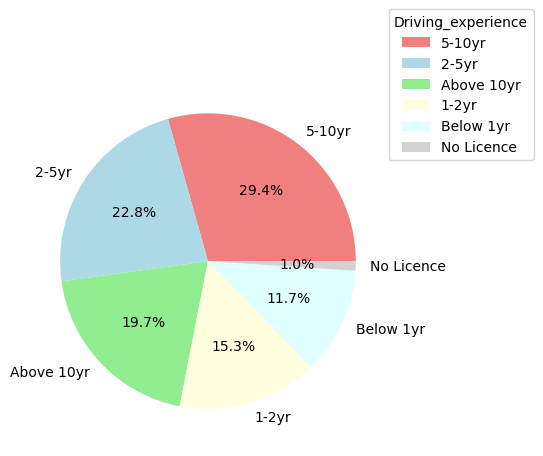

In [16]:
drv_exp = df['Driving_experience'].value_counts()
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightcyan', 'lightgray']

plt.pie(x = drv_exp, labels = drv_exp.index, autopct = '%1.1f%%', colors = colors);
plt.legend(bbox_to_anchor = [1.4, 1.2], title = 'Driving_experience');

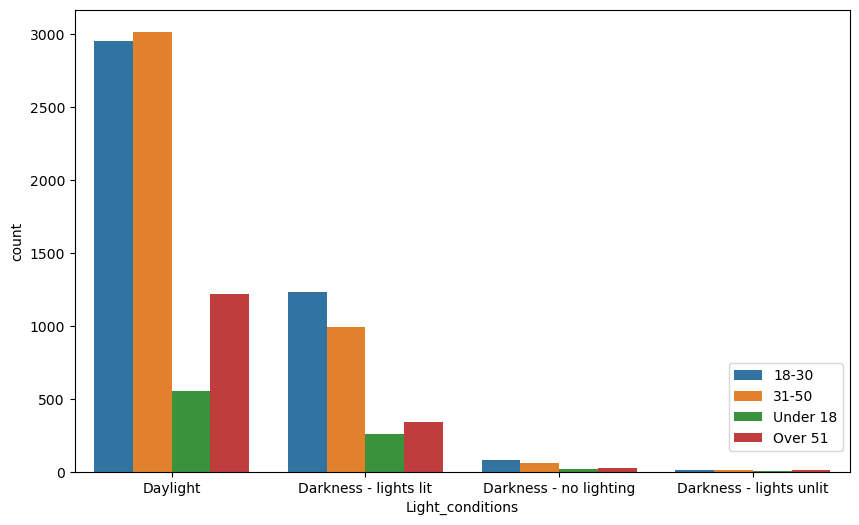

In [21]:

plt.figure(figsize = [10,6])
sb.countplot(x = df['Light_conditions'], hue = df['Age_band_of_driver']);
plt.legend(bbox_to_anchor = [1,0.25]);

- I thought Darkness would affect the vision of people who are Over 51y, but the result seems to be fair

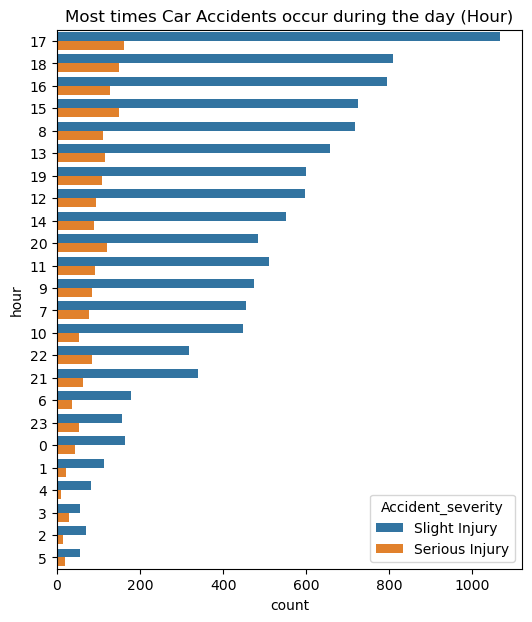

In [23]:

plt.figure(figsize = [6,7])
df['Time'] = pd.to_datetime(df['Time'], format='mixed')
df['hour'] = df['Time'].dt.hour
sorted_hour = df['hour'].value_counts().index

sb.countplot(y = df['hour'], order = sorted_hour, hue = df['Accident_severity']);
plt.title('Most times Car Accidents occur during the day (Hour)');

 - 17:00 or 5:00pm  is when car accidents reach the peak. Note worthy it is when employees clock out

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

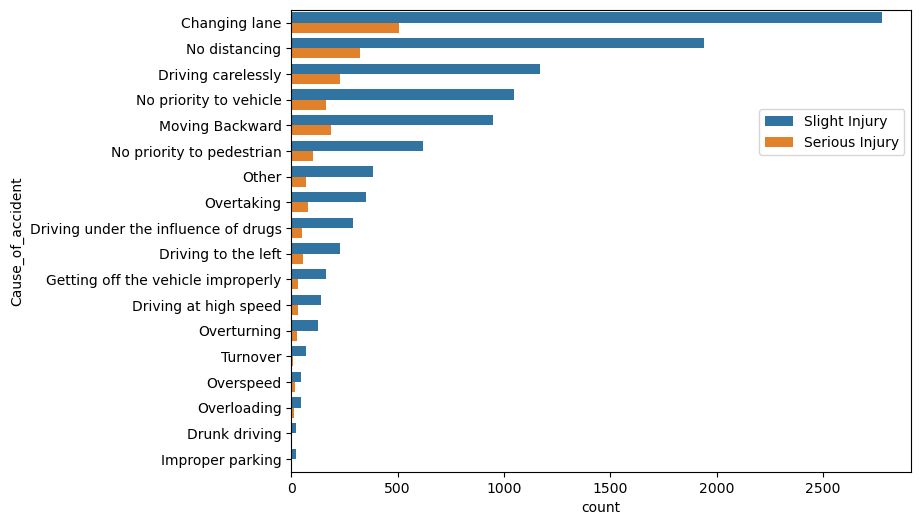

In [291]:
plt.figure(figsize = [8, 6])
sorted_cause = df['Cause_of_accident'].value_counts().index
sb.countplot(data = df, y = 'Cause_of_accident', hue = 'Accident_severity', order = sorted_cause);
plt.legend(bbox_to_anchor = [1,0.8]);

 In general, Serious car accidents occurs only rarely. However, we must zoom in to their causes to get a better understandinges.
       Tracking which of the given indivisuals who does these behaviors will help with modeling accurecy.

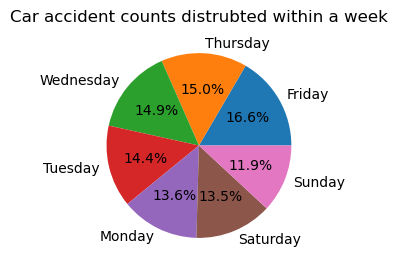

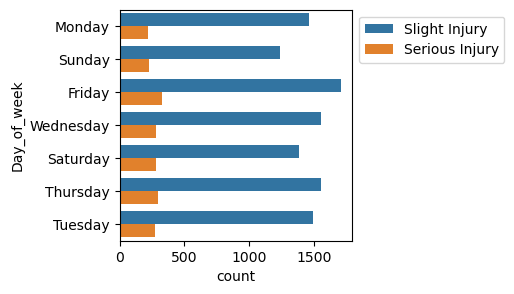

In [29]:
plt.figure(figsize = [3,3])
plt.pie(x = df['Day_of_week'].value_counts(), labels = df['Day_of_week'].value_counts().index, autopct = '%1.1f%%');
plt.title('Car accident counts distrubted within a week'), 

plt.figure(figsize = [3,3])
sb.countplot(data = df, y = 'Day_of_week', hue = 'Accident_severity')
plt.legend(bbox_to_anchor = [1,1]);


Graphs indicate that day of week almost has no impact on number of accident nor its severity. That being said, Friday seems to be the highest. The reason is probably because it is where most people go out for weekend activities.

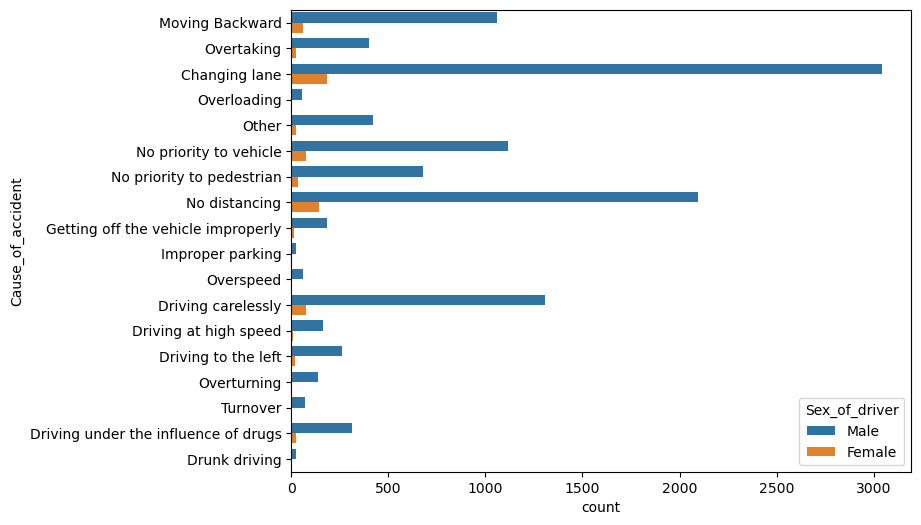

In [33]:
plt.figure(figsize = [8,6])
sb.countplot(data = df, y = 'Cause_of_accident', hue = 'Sex_of_driver');

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [41]:
X = df.drop(columns = 'Accident_severity')
y = df[['Accident_severity']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [45]:
onehot_cols = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Driving_experience', 'Area_accident_occured', 'Types_of_Junction', 'Light_conditions',
              'Cause_of_accident']

In [140]:
imputer = SimpleImputer(strategy = 'most_frequent')
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)

In [168]:
pipe = Pipeline(steps = [
    ('imputer', imputer),
    ('encoder', encoder)])
pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [170]:
X_train_pro = pipe.fit_transform(X_train)
X_train_pro

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [174]:
X_test_pro = pipe.transform(X_test)
X_test_pro

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [194]:
#Logistic Regresson Performance -- X_train
lr = LogisticRegression()
lr.fit(X_train_pro, y_train)

log_y_pred = lr.predict(X_train_pro)
accuracy_score(y_train, log_y_pred)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8557653268371904

In [192]:
#Logistic Regresson Performance -- X_test
lr.fit(X_test_pro, y_test)
log_y_pred_test = lr.predict(X_test_pro)
accuracy_score(y_test, log_y_pred_test)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.851461038961039

#### Decision Tree Classifier

In [237]:
#Decision Tree Classifier -- X_train
dt = DecisionTreeClassifier()
dt.fit(X_train_pro, y_train)

tree_y_pred = dt.predict(X_train_pro)
accuracy_score(y_train, tree_y_pred)

0.9998984977669508

In [323]:
#Decision Tree Classifier -- X_test
dt.fit(X_test_pro, y_test)
tree_test_pred = dt.predict(X_test_pro)
f1_score(y_test, tree_test_pred, average = 'macro')

0.999240803134152

#### Support Vector Machine (SVM)

In [208]:
#SVM --X_test
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_test_pro, y_test)
svc_pred_test = svc.predict(X_test_pro)


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [319]:
f1_score(y_test, svc_pred_test, average = 'macro')

0.4595616024187453

#### K-Neighbors Classifier

In [297]:
#KN --X_test
kn = KNeighborsClassifier()
kn.fit(X_test_pro, y_test)
kn_pred_test = kn.predict(X_test_pro)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [317]:
f1_score(y_test, kn_pred_test, average = 'macro')

0.6184066800090904

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [303]:
#confusion matrix from LR. Poor result
log_y_pred_test = lr.predict(X_test_pro)
confusion_matrix(y_test, log_y_pred_test)

array([[  33,  358],
       [   8, 2065]], dtype=int64)

In [305]:
# confusion matrix from SVC. Poor result
confusion_matrix(y_test, svc_pred_test)

array([[   1,  390],
       [   0, 2073]], dtype=int64)

In [307]:
#confusion matrix from KN. A bit better
confusion_matrix(y_test, kn_pred_test)

array([[  77,  314],
       [  24, 2049]], dtype=int64)

In [309]:
#confusion matrix from DTC. Fantastic result
tree_cm = confusion_matrix(y_test, tree_test_pred)
tree_cm

array([[ 391,    0],
       [   1, 2072]], dtype=int64)

In [311]:
f1_score(y_test, tree_test_pred, average='micro')

0.9995941558441559

In [331]:
dt.get_depth(), dt.get_n_leaves()

(207, 490)

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

- Decision Tree Classifier is the best model for this task as it is the only model which always returns a correct prediction for the data with an **f1Score** of  **0.9992**. 

- Decision Tree Classifier is probably what comes in mind when dealing with full categorized data due to its functionality of covering all possible senarios before making the prediction.
- To make this high accuracy possible, the model expanded up to **207 depth** and **490 leaves**.
